In [59]:
# Прочитайте CSV файл spark.read.csv()
# 2.	Вивести схему даних за допомогою PrintSchema.
# 3.	Вивести назви стовпців і типи даних за допомогою dtypes
!pip install pyspark
from pyspark.sql import SparkSession

# Створення SparkSession
spark = SparkSession.builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

# Завантаження CSV файлу
# Завантаження CSV файлу
df = spark.read.csv("/content/bestsellers with categories.csv", header=True, inferSchema=True)



# Виведення схеми даних
df.printSchema()

# Виведення назв стовпців і типів даних
print("Назви стовпців та типи даних:")
df.dtypes



root
 |-- Name: string (nullable = true)
 |-- Author: string (nullable = true)
 |-- User Rating: double (nullable = true)
 |-- Reviews: integer (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Genre: string (nullable = true)

Назви стовпців та типи даних:


[('Name', 'string'),
 ('Author', 'string'),
 ('User Rating', 'double'),
 ('Reviews', 'int'),
 ('Price', 'int'),
 ('Year', 'int'),
 ('Genre', 'string')]

In [60]:
# 4.	Виведіть перші п'ять рядків (використовується метод head)

print("Перші 5 рядків:")
df.head(5)




Перші 5 рядків:


[Row(Name='10-Day Green Smoothie Cleanse', Author='JJ Smith', User Rating=4.7, Reviews=17350, Price=8, Year=2016, Genre='Non Fiction'),
 Row(Name='11/22/63: A Novel', Author='Stephen King', User Rating=4.6, Reviews=2052, Price=22, Year=2011, Genre='Fiction'),
 Row(Name='12 Rules for Life: An Antidote to Chaos', Author='Jordan B. Peterson', User Rating=4.7, Reviews=18979, Price=15, Year=2018, Genre='Non Fiction'),
 Row(Name='1984 (Signet Classics)', Author='George Orwell', User Rating=4.7, Reviews=21424, Price=6, Year=2017, Genre='Fiction'),
 Row(Name='5,000 Awesome Facts (About Everything!) (National Geographic Kids)', Author='National Geographic Kids', User Rating=4.8, Reviews=7665, Price=12, Year=2019, Genre='Non Fiction')]

In [61]:
df.show(5)

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
only showing top 5 rows



In [62]:
# 5.	Вивести перший рядок за допомогою first()

print("Перший рядок:")
df.first()


Перший рядок:


Row(Name='10-Day Green Smoothie Cleanse', Author='JJ Smith', User Rating=4.7, Reviews=17350, Price=8, Year=2016, Genre='Non Fiction')

In [63]:
# 6.	Зробіть опис датасету за допомогою describe()

print("Опис датасету:")
df.describe().show()

Опис датасету:
+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|summary|                Name|          Author|        User Rating|           Reviews|             Price|              Year|      Genre|
+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|  count|                 550|             550|                550|               550|               550|               550|        550|
|   mean|                NULL|            NULL|  4.618363636363641|11953.281818181818|              13.1|            2014.0|       NULL|
| stddev|                NULL|            NULL|0.22698036502519656|11731.132017431892|10.842261978422364|3.1651563841692782|       NULL|
|    min|"The Plant Parado...|Abraham Verghese|                3.3|                37|                 0|              2009|    Fiction|
|    max|You Are a Badass:

In [64]:
# 7.	Виведіть список стовпців за допомогою columns()

print("Список стовпців:")
df.columns

Список стовпців:


['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']

In [65]:
# 8.	Виведіть загальну кількість рядків даних за допомогою count()


print("Загальна кількість рядків:")
df.count()

Загальна кількість рядків:


550

In [66]:
# 9.	Перевірте, чи у всіх рядків вистачає даних. Якщо є пропуски, замінить їх на NaN, потім тип даних на числовий.

from pyspark.sql.functions import isnan, when, count, col

# Підрахунок пропущених значень по стовпцях
missing_count = df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])

# Перевірка наявності пропусків у всіх рядках
if missing_count.select([count(when(col(c) == 0, c)).alias(c) for c in missing_count.columns]).first():
    print("Немає пропущених значень.")
else:
    print("Є пропущені значення.")
    # Заміна пропущених значень на NaN
    df = df.na.fill('NaN')


Немає пропущених значень.


In [67]:
df.show(5)

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
only showing top 5 rows



In [68]:
# 10.	Замініть комірки з пропущеними значенями на середні за стовпцем. І тип даних на float.
# Про скільки книг зберігає дані датасет?

from pyspark.sql.functions import mean

# Виберемо середні значення для кожного стовпця
mean_user_rating = df.select(mean("User Rating")).collect()[0][0]
mean_reviews = df.select(mean("Reviews")).collect()[0][0]
mean_price = df.select(mean("Price")).collect()[0][0]
mean_year = df.select(mean("Year")).collect()[0][0]

# Заміна пропущених значень відповідно до середніх значень
df = df.fillna(mean_user_rating, subset=['User Rating'])
df = df.fillna(mean_reviews, subset=['Reviews'])
df = df.fillna(mean_price, subset=['Price'])
df = df.fillna(mean_year, subset=['Year'])


# Виведення кількості книг у датасеті
books_count = df.count()
print("Кількість книг у датасеті:", books_count)

Кількість книг у датасеті: 550


In [69]:
df.show(5)

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
only showing top 5 rows



In [70]:
# Імпорт функції trim з pyspark.sql.functions
from pyspark.sql.functions import trim

# Видаляємо пробіли з початку і кінця значень у стовпці "name"
df = df.withColumn("name", trim(df["name"]))

# Видаляємо пробіли з початку і кінця значень у стовпці "author"
df = df.withColumn("author", trim(df["author"]))

# Видаляємо пробіли з початку і кінця значень у стовпці "genre"
df = df.withColumn("genre", trim(df["genre"]))

# Переіменовуємо стовпці з уже очищеними даними
df = df.toDF('name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre')

# Виведемо перші 5 рядків
print("Перші 5 рядків після видалення пробілів та переіменування стовпців:")
df.show(5)


Перші 5 рядків після видалення пробілів та переіменування стовпців:
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                name|              author|user_rating|reviews|price|year|      genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
only showing top 5 rows



In [71]:
# 11.	Змініть назви всіх колонок: назва з маленької букви, без пробілів через підкреслення.
# 12.	df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

df = df.toDF('name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre')

In [72]:
df.show(5)

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                name|              author|user_rating|reviews|price|year|      genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
only showing top 5 rows



In [73]:
# 13.	Знайдіть автора з найвищим рейтингом.
# Видалення рядків з пропущеними значеннями у стовпці "user_rating"
df = df.filter(df["user_rating"].isNotNull())

# Знайдення автора з найвищим рейтингом
max_rating_author = df.orderBy(df['user_rating'].desc()).select('author').first()

if max_rating_author:
    max_rating_author = max_rating_author[0]
else:
    max_rating_author = "Немає даних"

print("Автор з найвищим рейтингом:", max_rating_author)


Автор з найвищим рейтингом: Bill Martin Jr.


In [74]:
# 14.	Знайдіть автора з найнижчим рейтингом.

min_rating_author = df.orderBy(df['user_rating']).select('author').first()[0]
print("Автор з найнижчим рейтингом:", min_rating_author)

Автор з найнижчим рейтингом: J.K. Rowling


In [75]:
# 15.	Знайдіть автора, що має найбільшу кількіть рецензій.

max_reviews_author = df.orderBy(df['reviews'].desc()).select('author').first()[0]

print("Автор з найбільшою кількістю рецензій:", max_reviews_author)

Автор з найбільшою кількістю рецензій: Delia Owens


<Axes: title={'center': 'Гістограма рейтингу для 10 найкращих книг'}, xlabel='name'>

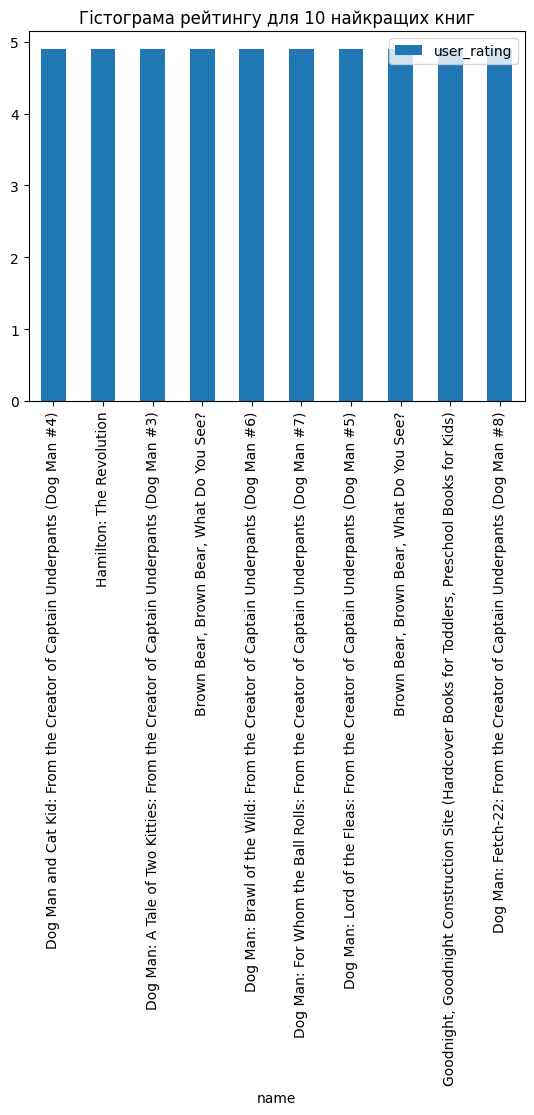

In [76]:
# 16.	Побудуйте гістограму рейтингу 10 найкращих книг (відібрати книги з найбільшим рейтингом).
top_10_books = df.orderBy(df['user_rating'].desc()).limit(10)
top_10_books.toPandas().plot(kind='bar', x='name', y='user_rating', title="Гістограма рейтингу для 10 найкращих книг")


In [78]:
# 17.	Побудуйте матрицю кореляції для стовпчиків 'user_rating', 'reviews', 'price'.

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

# Створення вектора ознак з стовпців 'user_rating', 'reviews', 'price'
assembler = VectorAssembler(inputCols=['user_rating', 'reviews', 'price'], outputCol="features")
df_assembled = assembler.transform(df).select("features")

# Побудова матриці кореляції
correlation_matrix = Correlation.corr(df_assembled, "features").head()

# Виведення матриці кореляції
print("Матриця кореляції для стовпців 'user_rating', 'reviews', 'price':")
print(correlation_matrix)


Матриця кореляції для стовпців 'user_rating', 'reviews', 'price':
Row(pearson(features)=DenseMatrix(3, 3, [1.0, -0.0017, -0.1331, -0.0017, 1.0, -0.1092, -0.1331, -0.1092, 1.0], False))
